## As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of 5.00 per customer.

## In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Telco data from the telco_churn database in the Codeup database server.

# Imports

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from env import host, user, password
from wrangle import get_data_from_mysql, wrangle_telco

## Acquire customer_id, monthly_charges, tenure, and total_charges from the telco_churn database for all customers with a 2-year contract.

In [2]:
def get_data_from_mysql(query, database):
    '''Takes in a SQL query and a database name
       Returns the results of the SQL query using the input database'''

    # create url string from user info and desired database
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'

    # return SQL query using read_sql
    return pd.read_sql(query, url)

In [3]:
query = """ 

        SELECT customer_id, monthly_charges, tenure, total_charges 
        FROM  customers           
        JOIN contract_types USING(contract_type_id)
        WHERE contract_type = 'Two Year'
            
        """ 

df = get_data_from_mysql(query, 'telco_churn')

df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


## Using your acquired Telco data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

## Get size of the data

In [4]:
df.shape

(1695, 4)

## Check that data types are appropriate

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


* There are no nulls in the data
* total_charges should be recast from object to float
* I wonder why pandas thinks its a object?
* Check for wierd values

# Check for wierd values

In [6]:
# check for wierd values using value counts
df.total_charges.value_counts()

           10
844.45      2
7334.05     2
3533.6      2
1110.05     2
           ..
7156.2      1
1688.9      1
1054.8      1
3389.25     1
553         1
Name: total_charges, Length: 1678, dtype: int64

* Ten of the cells contain only spaces
* Because only a few would be lost I am going to drop the rows containing these values

## Dropping rows with cells containing only spaces

In [7]:
# replace space with nan
df.replace(' ', np.nan, inplace=True)

# drop rows containing nans in total_charges
df.dropna(subset= ['total_charges'], inplace=True)

In [8]:
# checking shape to insure the correct number of lines are removed
df.shape

(1685, 4)

## Casting total_charges as float

* values that cannot be interprited as numbers must be removed before this step can be performed 

In [9]:
df.total_charges = df.total_charges.astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1685 non-null   object 
 1   monthly_charges  1685 non-null   float64
 2   tenure           1685 non-null   int64  
 3   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


## Checking for any other strange values 

In [11]:
for column in df.columns:
    
    print(column.upper())
    print(df[column].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~')
    print()

CUSTOMER_ID
5668-MEISB    1
2805-AUFQN    1
9674-EHPPG    1
0455-ENTCR    1
2208-NKVVH    1
             ..
0739-UUAJR    1
3096-YXENJ    1
5148-HKFIR    1
0794-YVSGE    1
2162-FRZAA    1
Name: customer_id, Length: 1685, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~

MONTHLY_CHARGES
19.70    21
19.85    20
20.05    19
19.55    18
19.75    17
         ..
39.15     1
95.25     1
74.85     1
29.60     1
88.65     1
Name: monthly_charges, Length: 817, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~

TENURE
72    343
71    137
70     88
69     66
68     65
     ... 
3       3
1       2
5       1
28      1
2       1
Name: tenure, Length: 72, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~

TOTAL_CHARGES
1110.05    2
844.45     2
7334.05    2
5682.25    2
5714.20    2
          ..
7774.05    1
1022.60    1
4234.15    1
1566.90    1
6172.00    1
Name: total_charges, Length: 1677, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~



* Data types look good
* customer_id contains all unique values and for this reason provides no real information

## Dropping customer_id column

In [12]:
df = df.drop(columns=['customer_id'])

In [13]:
df.head()

,monthly_charges,tenure,total_charges
0,109.70,71,7904.25
1,84.65,63,5377.80
2,90.45,65,5957.90
3,45.20,54,2460.55
4,116.80,72,8456.75


## Final check for datatypes and nulls

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1685 non-null   float64
 1   tenure           1685 non-null   int64  
 2   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 52.7 KB


In [15]:
df.isnull().sum()

monthly_charges    0
tenure             0
total_charges      0
dtype: int64

* data looks good moving on to summary stats

## Look at summary stats

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,1685.0,60.872374,34.712210,18.40,24.05,64.45,90.55,118.75
tenure,1685.0,57.071810,17.729130,1.00,48.00,64.00,71.00,72.00
total_charges,1685.0,3728.933947,2571.252806,20.35,1278.80,3623.95,5999.85,8672.45


## Look at distribution of variables

## Histographs

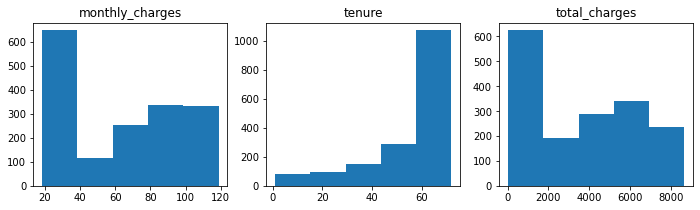

In [17]:
plt.figure(figsize=(16, 3))

# List of columns
cols = df.columns

for i, col in enumerate(cols):

    # i starts at 0, but plot should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

* distributions are not normal
* mode mothly payment for two-year customers is 20-40 dollors
* mode tenure for two_year customers is +60 years
* mode total_charges for two_year customers is between 0 and 2000 dollors
* total_charges for two-year customers range as high as 8500 dollors 

## Box plots using the method for the curriculum  

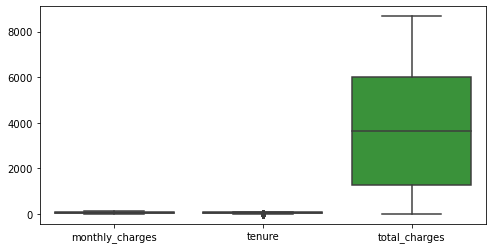

In [18]:
# set figure size
plt.figure(figsize=(8,4))

# get box plots for the full dataset
sns.boxplot(data=df)
plt.show()

* scale of veriables is too far appart to graph on the same plot, so I'm going to plot them one at a time

## Box plots one at a time

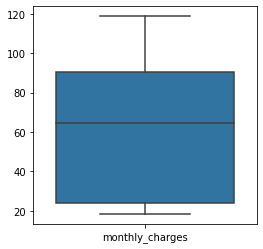

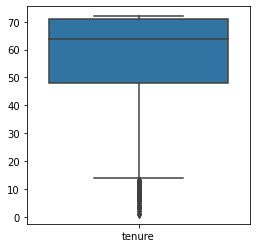

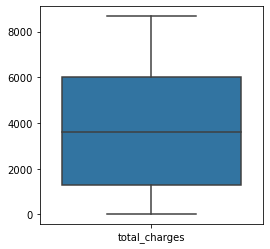

In [19]:
# plot each column as a boxplot
for column in df.columns:

    plt.figure(figsize=(4,4))
    sns.boxplot(data=df[[column]])
    plt.show()

* lots of outliers for data in tenure, make sure to scale using a method that is resistant to outliers 

## End with a wrangle.py file that contains the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values. Name your final function wrangle_telco.

In [20]:
# inside py file 

from env import host, user, password
import pandas as pd
import numpy as np


#***************************Get Data From SQL******************************
def get_data_from_mysql(query, database):
    '''Takes in a SQL query and a database name
       Returns the results of the SQL query using the input database'''

    # create url string from user info and desired database
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'

    # return SQL query using read_sql
    return pd.read_sql(query, url)

#****************************Wrangle Telco Data*****************************

def wrangle_telco():
    ''' Acquires and cleans Telco data'''
    
    query = """ 

        SELECT customer_id, monthly_charges, tenure, total_charges 
        FROM  customers 
            
        JOIN contract_types USING(contract_type_id)
        WHERE contract_type = 'Two Year'
            
        """ 

    # get query results by utilizing get_data_from_mysql function
    df = get_data_from_mysql(query, 'telco_churn')

    # replace space values (found in total charges) with nan
    df.replace(' ', np.nan, inplace=True)

    # drop rows containing nans in total_charges
    df.dropna(subset= ['total_charges'], inplace=True)

    # recast total charges as float
    df.total_charges = df.total_charges.astype(float)

    # drop customer_id
    df = df.drop(columns=['customer_id'])

    return df

In [21]:
df = wrangle_telco()
df.head()

,monthly_charges,tenure,total_charges
0,109.70,71,7904.25
1,84.65,63,5377.80
2,90.45,65,5957.90
3,45.20,54,2460.55
4,116.80,72,8456.75


# Formal Report

## Imports

In [22]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from env import host, user, password
from wrangle import get_data_from_mysql, wrangle_telco, histographs, boxplots

## Wrangle

* Data acquired from Telco_Churn database using SQL Ace
* Imported the customer_id, monthly_charges, tenure, and total_charges from the telco_churn database for all customers with a 2-year contract
* Dropped 10 rows do to having spaces as values in the total_charges column
* Cast total_charges from object to float after removing those rows
* Dropped customer_id, do to it being a unique identifier and containing no useful information

In [23]:
df = wrangle_telco()

#### Summary of Univariate Values

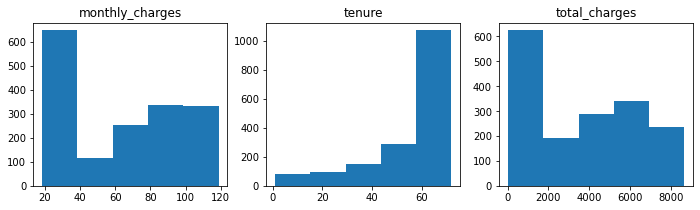

In [24]:
histographs(df)

* Distributions are not normal
* Mode mothly payment for two-year customers is 20-40 dollors
* Mode tenure for two_year customers is +60 years
* Mode total_charges for two_year customers is between 0 and 2000 dollors
* Motal_charges for two-year customers range as high as 8500 dollors 

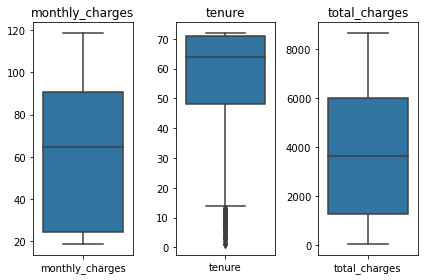

In [25]:
boxplots(df)

* lots of outliers for data in tenure, make sure to scale using a method that is resistant to outliers 